In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cs-challenge/test_set.csv
/kaggle/input/cs-challenge/training_set.csv
/kaggle/input/cs-challenge/submission_example.csv


In [2]:
train = pd.read_csv("../input/cs-challenge/training_set.csv", index_col="ID").drop("MAC_CODE", axis = 1)

In [3]:
train = train.dropna(axis = 1)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaler.fit(train)
train = pd.DataFrame(scaler.transform(train), columns = train.columns, index = train.index)
train

,TARGET,Date_time,Pitch_angle,Pitch_angle_min,Pitch_angle_max,Pitch_angle_std,Hub_temperature,Hub_temperature_min,Hub_temperature_max,Hub_temperature_std,...,Grid_frequency_max,Grid_frequency_std,Rotor_speed,Rotor_speed_min,Rotor_speed_max,Rotor_speed_std,Rotor_bearing_temperature,Rotor_bearing_temperature_min,Rotor_bearing_temperature_max,Rotor_bearing_temperature_std
ID,,,,,,,,,,,,,,,,,,,,,
3,-0.797557,-1.767800,2.916388,2.980629,2.782599,-0.225182,-1.840409,-1.802000,-1.871909,-0.682740,...,-0.006713,-0.020802,-1.765232,-1.650564,-1.867311,-0.788128,-3.584334,-3.566563,-3.577339,-0.306693
7,-0.795655,-1.767711,2.916388,2.980629,2.782599,-0.225182,-1.991847,-1.952866,-1.897654,-0.300619,...,-36.114267,-0.052466,-1.765232,-1.650564,-1.867311,-0.788128,-3.584334,-3.566563,-3.577339,-0.306693
10,-0.795655,-1.767645,2.916388,2.980629,2.782599,-0.225182,-2.278066,-2.254598,-2.174788,2.310540,...,-36.114267,-0.052466,-1.765232,-1.650564,-1.867311,-0.788128,-3.584334,-3.573443,-3.577339,-0.306693
13,-0.808642,-1.753081,2.916388,2.980629,2.782599,-0.225182,-3.203355,-3.310658,-3.234866,1.673672,...,0.036641,-0.020802,-1.765232,-1.650564,-1.867311,-0.788128,-4.266236,-4.288935,-4.255680,0.341097
14,-0.801573,-1.753059,2.916388,2.980629,2.782599,-0.225182,-3.061002,-3.159792,-3.083427,1.546298,...,0.014964,-0.020802,-1.765232,-1.650564,-1.867311,-0.788128,-4.241439,-4.254536,-4.221421,0.017202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617381,1.652972,1.721902,-0.514087,-0.473127,-0.552234,-0.222801,-0.174587,-0.205840,-0.206072,-0.491680,...,0.036641,-0.020802,1.207789,0.996067,1.034855,-0.304111,1.029181,1.029100,1.054571,0.470655
617383,1.595153,1.721946,-0.514454,-0.473127,-0.555090,-0.225182,-0.176101,-0.222436,-0.206072,-0.364306,...,0.022188,-0.020802,1.195576,1.179989,1.029857,-0.343356,1.018160,1.001581,1.006607,0.081981
617384,1.816965,1.721969,-0.507114,-0.473127,-0.465828,-0.087048,-0.174587,-0.177176,-0.206072,-0.619053,...,0.022188,-0.020802,1.207789,1.231487,1.034855,-0.395682,1.052600,1.029100,1.040867,0.341097


In [5]:
from sklearn import linear_model

lasso_reg = linear_model.LassoCV(cv=5, random_state=0, max_iter=10000).fit(train.drop("TARGET",axis=1), train["TARGET"])
print(lasso_reg.score(train.drop("TARGET",axis=1), train["TARGET"]))

0.9125621808692068


<BarContainer object of 62 artists>

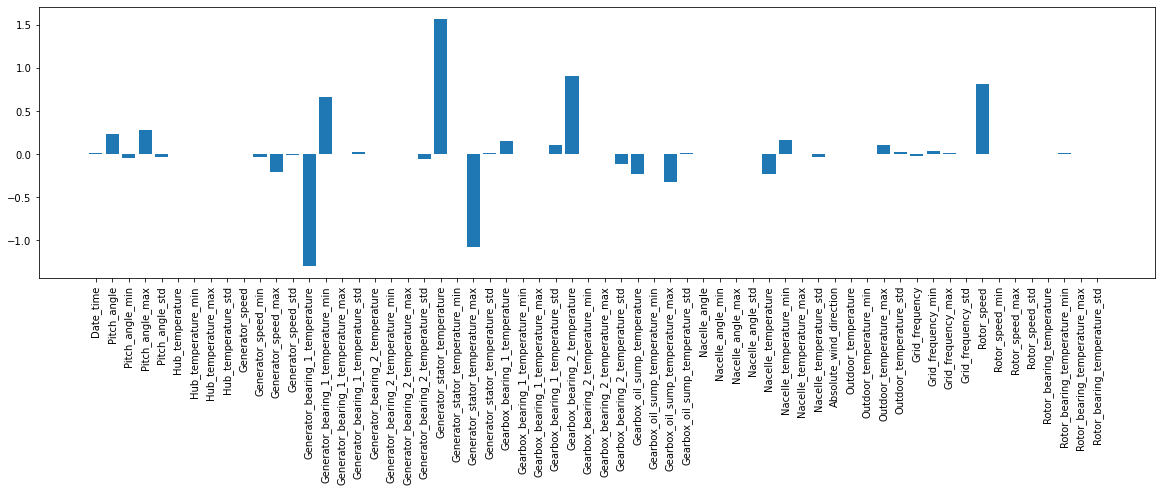

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.xticks(rotation = 'vertical')
plt.bar(train.drop("TARGET", axis=1).columns, lasso_reg.coef_)

In [7]:
column_list = column_list = train.columns.to_list()
base_cols = [x for x in column_list if x.find('_max') == -1 and x.find('_min') == -1 and x.find('_c') == -1]

In [8]:
train_base = train[base_cols]
train_base

,TARGET,Date_time,Pitch_angle,Pitch_angle_std,Hub_temperature,Hub_temperature_std,Generator_speed,Generator_speed_std,Generator_bearing_1_temperature,Generator_bearing_1_temperature_std,...,Nacelle_temperature_std,Absolute_wind_direction,Outdoor_temperature,Outdoor_temperature_std,Grid_frequency,Grid_frequency_std,Rotor_speed,Rotor_speed_std,Rotor_bearing_temperature,Rotor_bearing_temperature_std
ID,,,,,,,,,,,,,,,,,,,,,
3,-0.797557,-1.767800,2.916388,-0.225182,-1.840409,-0.682740,-1.768843,-0.777428,-3.703445,-1.257178,...,-0.684565,1.534247,-1.541599,-0.695228,0.000379,-0.020802,-1.765232,-0.788128,-3.584334,-0.306693
7,-0.795655,-1.767711,2.916388,-0.225182,-1.991847,-0.300619,-1.768794,-0.786027,-3.703445,-1.257178,...,-0.569666,1.344572,-1.551533,-0.695228,-39.837925,-0.052466,-1.765232,-0.788128,-3.584334,-0.306693
10,-0.795655,-1.767645,2.916388,-0.225182,-2.278066,2.310540,-1.768843,-0.783908,-3.753577,-0.944618,...,-0.531367,1.172273,-1.552775,-0.983320,-39.837925,-0.052466,-1.765232,-0.788128,-3.584334,-0.306693
13,-0.808642,-1.753081,2.916388,-0.225182,-3.203355,1.673672,-1.768976,-0.787148,-4.921431,-0.909889,...,-0.071773,-0.530427,-1.806100,0.361110,0.024303,-0.020802,-1.765232,-0.788128,-4.266236,0.341097
14,-0.801573,-1.753059,2.916388,-0.225182,-3.061002,1.546298,-1.768976,-0.787148,-4.891808,-0.979347,...,0.100575,-0.713131,-1.811067,-0.407136,0.032275,-0.020802,-1.765232,-0.788128,-4.241439,0.017202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617381,1.652972,1.721902,-0.514087,-0.222801,-0.174587,-0.491680,1.205449,-0.308612,0.154460,2.180983,...,1.402757,0.591389,-0.118509,-0.311105,0.040248,-0.020802,1.207789,-0.304111,1.029181,0.470655
617383,1.595153,1.721946,-0.514454,-0.225182,-0.176101,-0.364306,1.192949,-0.340888,-0.412946,0.826556,...,0.770816,0.549146,-0.117267,-0.503167,0.032275,-0.020802,1.195576,-0.343356,1.018160,0.081981
617384,1.816965,1.721969,-0.507114,-0.087048,-0.174587,-0.619053,1.205365,-0.395596,-0.261410,0.791827,...,0.636767,0.561840,-0.099882,-0.407136,0.032275,-0.020802,1.207789,-0.395682,1.052600,0.341097


In [9]:
from sklearn import linear_model

lasso_reg_base = linear_model.LassoCV(cv=5, random_state=0, max_iter=20000, fit_intercept=True,normalize = True).fit(train_base.drop("TARGET",axis=1), train_base["TARGET"])
print(lasso_reg_base.score(train_base.drop("TARGET",axis=1), train_base["TARGET"]))

0.898162227404985


<BarContainer object of 32 artists>

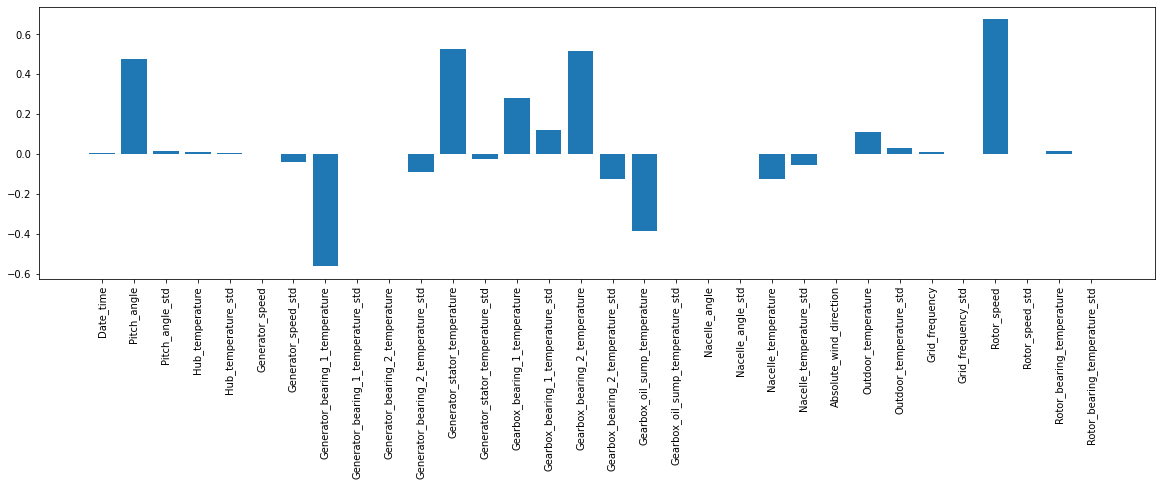

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.xticks(rotation = 'vertical')
plt.bar(train_base.drop("TARGET", axis=1).columns, lasso_reg_base.coef_)

In [11]:
test = pd.read_csv("../input/cs-challenge/test_set.csv", index_col = "ID").drop("MAC_CODE",axis=1)
test["TARGET"] = np.ones(len(test.index))
#test[train.columns.to_list()]
test = pd.DataFrame(scaler.transform(test[train.columns.to_list()]), index=test.index, columns=train.columns)
p1 = lasso_reg.predict(test[train.columns.to_list()].drop("TARGET", axis=1))

In [12]:
test['TARGET'] = p1
a1 = pd.DataFrame(scaler.inverse_transform(test[train.columns.to_list()]), index=test.index, columns=test.columns)['TARGET']
a1.to_csv('a1.csv')

In [13]:
p2 = lasso_reg_base.predict(test[train_base.columns.to_list()].drop("TARGET", axis=1))

In [14]:
test["TARGET"] = p2
a2 = pd.DataFrame(scaler.inverse_transform(test[train.columns.to_list()]), index=test.index, columns=test.columns)['TARGET']
a2.to_csv('a2.csv')